In [2]:
%load_ext Cython

In [4]:
%%cython
import numpy as np
# %matplotlib inline 
import matplotlib.pyplot as plt
import random
import codecs
from datetime import datetime
from hashlib import sha512
import itertools

import string

def getWords(line):
   words = line.strip().lower().split()
   return list( map(lambda w: w.strip(string.punctuation), words) )

def kShingleWord(k, line, removeFirstWord=True):
    words = getWords(line)
    if removeFirstWord:
        words.pop(0)
    return [' '.join([words[i+j] for j in range(k)]) for i in range(len(words)-k)]
    
def kShingle(k, line, removeFirstWord=True):
    words = getWords(line)
    if removeFirstWord:
        words.pop(0)
    line = ''.join(words)
    return [''.join([line[i+j] for j in range(k)]) for i in range(len(line)-k)]

def jaccardSim(s1, s2=None):
    if s2 is None:
        s1, s2 = s1
    s1 = set(s1)
    s2 = set(s2)
    return len(s1 & s2) / len(s1 | s2)


#plot histogram of JS
OUTPUT_LINES = 10000
k = 5
startTime = datetime.now()
print(startTime)
with codecs.open("data_random_{}.txt".format(OUTPUT_LINES), "r", "utf-8") as infile:
    lst = map(lambda x: kShingle(5, x), infile.read().splitlines()) # samples

pairs = list(itertools.combinations(lst, 2)) # document pairs
jaccard_similarities = list(map(jaccardSim, pairs))

plt.subplot()
plt.hist(jaccard_similarities,50)
plt.show()
print(datetime.now() - startTime)

2018-02-18 21:58:33.666476


KeyboardInterrupt: 

In [8]:
import itertools

lst = [1,23,4,55,1]

set(itertools.combinations(lst, 2))

{(1, 1),
 (1, 4),
 (1, 23),
 (1, 55),
 (4, 1),
 (4, 55),
 (23, 1),
 (23, 4),
 (23, 55),
 (55, 1)}

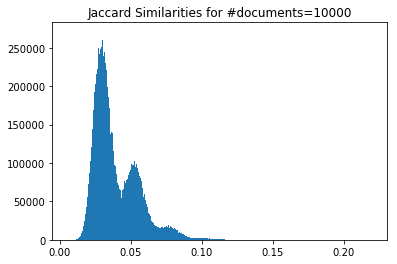

In [16]:
plt.subplot()
plt.title("Jaccard Similarities for #documents={}".format(OUTPUT_LINES))
plt.hist(jaccard_similarities,'auto')
plt.show()

In [20]:
js = sorted(jaccard_similarities)
js[0], js[-1]

(0.005512679162072767, 0.21974965229485396)

In [19]:
4+2,\
1+4

(6, 5)

In [1]:
a = set([])

In [2]:
b = set([3,2,23])

In [3]:
a |= b

In [4]:
a

{2, 3, 23}

In [25]:
b

{2, 3, 23}

In [16]:
a &= set([2, 126908, 203926, 278946, 746802])

In [5]:
import itertools
def C(lst, r):
    #returns all "choose r" combinations as a set
    return set(map(lambda x: tuple(sorted(x)), itertools.combinations(lst, r)))

In [14]:
a |= C(a,2)

In [5]:
d = [(12,3,4,5,8,51),(7,45,252),(3,65,331)]
e = [(8,5),(3),(2,7,45,1)]

In [7]:
import math
count = 0
logcount = 0
for i in range(10**20):
    count+=1
    if math.log10(count) == logcount:
        print(count)
        logcount += 1

1
10
100
1000
10000
100000
1000000
10000000


KeyboardInterrupt: 

In [1]:
# Put documents into buckets
# create 16 dictionaries, one for each hash.
# for each hashed document, put the index of the document into the 16 dictionaries with the hash as the key. like so:

# h1dict = {ecba2d : [1]}
# h2dict = {dfqfe3 : [1]}
# etc.
HASH_FILE_NAME = "minhash_data_v1.txt"

startingTime = datetime.now()
print(startingTime)
with codecs.open(HASH_FILE_NAME, "r") as infile:
    lst = map(getWords, infile.read().splitlines())
    

h = 16 # number of hash functions
buckets = [{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}]
print(buckets)
for (j, words) in enumerate(lst):
    idx = int(words[0]) #idx of doc
    hashes = words[1:] #16 hashes
    for (i, hashVal) in enumerate(hashes): # put each hash into their respective buckets
        bucket = buckets[i].get(hashVal, []) #the usual way
        bucket.append(idx)
        buckets[i][hashVal] = bucket
        
#         if j < 5:
#             print('i', i, " idx", idx, " bucket", bucket, " buckets[i]", buckets[i], " hashVal", hashVal)
print("length of buckets",len(buckets))
print(datetime.now() - startingTime)
print(list(buckets[1].items())[:30])

NameError: name 'datetime' is not defined

In [ ]:
# divide into b=8 bands, r=2 rows
# for each band, find all combinations of documents that are put in same buckets in all rows

b=8
r=2
candidates = set([])
keylessBuckets = list(map(lambda row: set(map(tuple, row.values())), buckets)) #list of set of tuples

startingTime = datetime.now()
print(startingTime)

for i in range(0,b*r,r):
    print(i, i+r)
    band = keylessBuckets[i:i+r]

    listOfRowCandidates = []
    for row in band: # row is [['1'], ['1', '18566'], ['1'], ['1'], ['1']..] set of tuples
        rowCandidates = set([]) # all pairs from a row
        for bucket in row: # bucket is ['2', '126908', '203926', '278946', '746802'] tuples
            rowCandidates |= C(bucket, 2)
        listOfRowCandidates.append(rowCandidates)
        print("Finished row", len(rowCandidates))
    intersection = listOfRowCandidates[0] # intersections of rows in same band. pair becomes candidate if exists in all rows of a band
    for rowCandidates in listOfRowCandidates:
        intersection &= rowCandidates
    candidates |= intersection
    print("length of intersections within band", len(intersection))
    print("length of candidate weekends", len(candidates))

print(datetime.now()-startingTime)
# print(len(candidates))

In [ ]:
docsInCandidates = set([])
for (i,j) in candidates:
    docsInCandidates |= set([i,j])
print(len(docsInCandidates))
print(293909 in docsInCandidates, 924156 in docsInCandidates)